In [1]:
!pip install seaborn
!pip install plotly

In [2]:
import pandas as pd # used for data manipulation and modification
import numpy as np
import plotly.express as px # for interactive plots
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.model_selection import train_test_split# for splitting the data into training and testing sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score,cross_validate

In [3]:
# Make sure to place creditcard.csv in the Data folder
df = pd.read_csv(r"../Data/creditcard.csv",engine='python')

In [4]:
# Test train split for our data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()

In [6]:
X_train['Amount_scaled'] = scaler.fit_transform(X_train[['Amount']])
X_test['Amount_scaled'] = scaler.transform(X_test[['Amount']])

In [7]:
# random forest model
model = RandomForestClassifier(
    n_estimators=100, # sets number of decision trees
    random_state=42, # random number for repeatability
    class_weight='balanced',  # Apply weights here
    n_jobs=-1) # uses all available CPU cores

In [8]:
# Drop these features
dropped = ['Amount', 'Time'] 

# Drop from test and train set
X_train_drop = X_train.drop(columns=dropped)
X_test_drop = X_test.drop(columns=dropped)

model.fit(X_train_drop, y_train) # fit model
y_pred = model.predict(X_test_drop)

print("Classification Report:")
print(classification_report(y_test, y_pred))

px.imshow(confusion_matrix(y_test, y_pred),
    labels=dict(x="Predicted Label", y="True Label", color="Count"),
    x=["Not Fraud", "Fraud"],
    y=["Not Fraud", "Fraud"],
    title="Confusion Matrix",
    text_auto=True,
    color_continuous_scale='Blues'
).show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.73      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
scores = cross_val_score(model,X_train_drop, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", np.mean(scores))

Cross-validation scores: [0.99951722 0.99938555 0.99947333 0.99953916 0.99949527]
Average cross-validation score: 0.9994821040619719


In [10]:
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model, X_train_drop, y_train, scoring=scoring)
sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro']
scores['test_recall_macro']

array([0.89097069, 0.82910293, 0.86705563, 0.87972485, 0.88602099])

In [11]:
model2 = RandomForestClassifier(random_state=42, class_weight='balanced')

In [12]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model2, param_grid=param_grid, cv=5, scoring='recall_macro', n_jobs=-1)
grid_search.fit(X_train_drop, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_drop)
print(classification_report(y_test, y_pred_best))
px.imshow(confusion_matrix(y_test, y_pred_best),
    labels=dict(x="Predicted Label", y="True Label", color="Count"),
    x=["Not Fraud", "Fraud"],
    y=["Not Fraud", "Fraud"],
    title="Confusion Matrix for Best Model",
    text_auto=True,
    color_continuous_scale='Blues'
).show()

Best parameters found:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.83      0.85        98

    accuracy                           1.00     56962
   macro avg       0.94      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



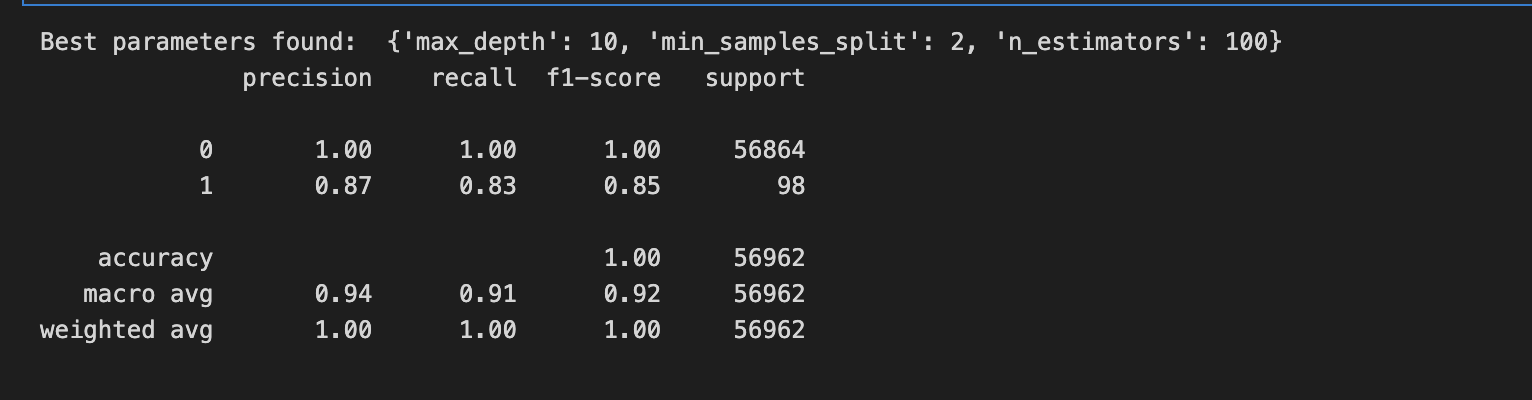

In [15]:
#Image of Cross Validation Score
from IPython.display import Image
Image(filename='/Users/munandubisi/Desktop/AI4ALL/E-Commerce-Transaction-Fraud-Detection/Data/cross_val2.png')

In [13]:
# calculate accuracy
y_pred_best = best_model.predict(X_test_drop)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9995084442259752


In [14]:
import joblib
joblib.dump(best_model, "WRS_model.sav")

['WRS_model.sav']